# Deep Learning -Iris dataset with Tensorboard Plots
By - Shadab Kalim

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import sys
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Text(0.5,0.98,'Pair Plot')

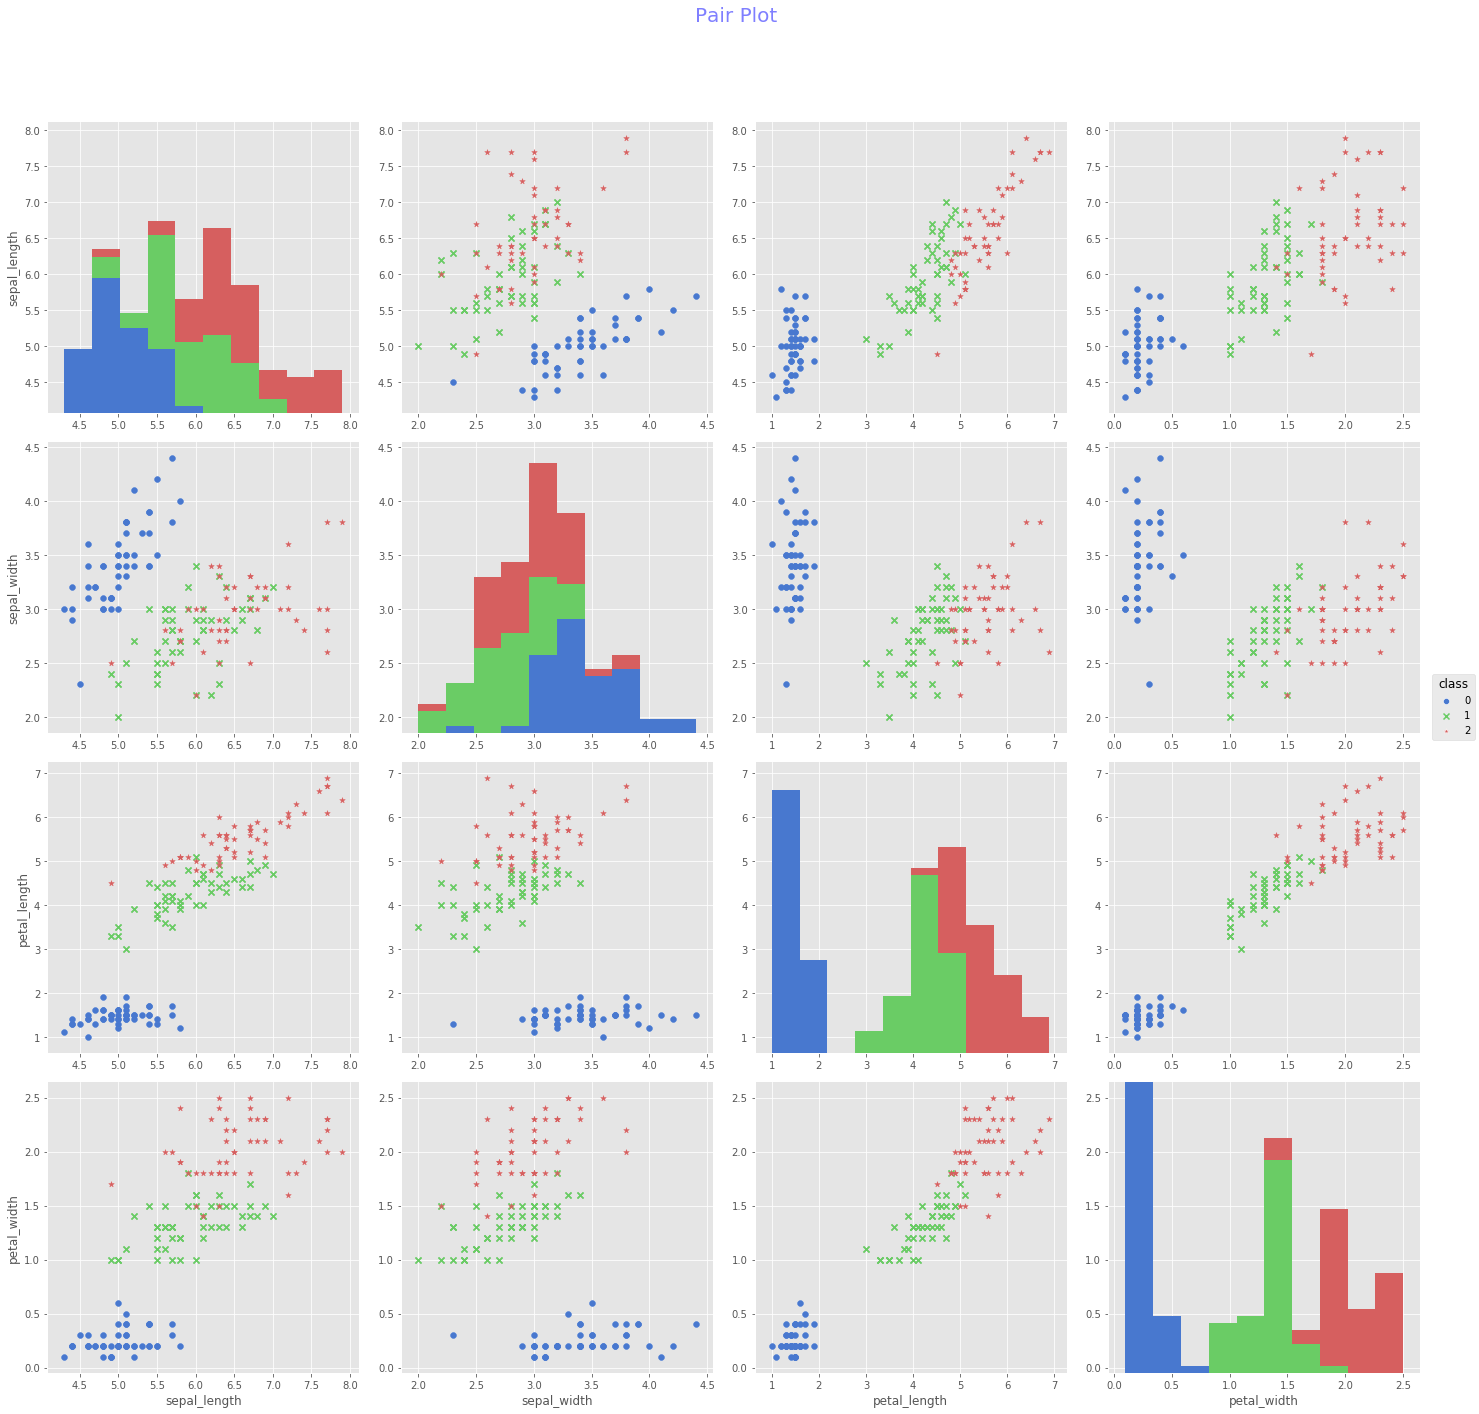

In [2]:
iristrain_df = pd.read_csv('iris_training.csv',header=0, names=['sepal_length', 'sepal_width','petal_length', 'petal_width', 'class'])
iristest_df = pd.read_csv('iris_test.csv',header=0, names=['sepal_length', 'sepal_width','petal_length', 'petal_width', 'class'])
#Plotting a combined train and test dataset
irisfull = iristrain_df.append(iristest_df)
a = sns.pairplot(irisfull, hue = 'class', palette = "muted", size = 5,\
                 vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],\
                 kind = 'scatter', markers = ['o','x','*'])
a = a.map_offdiag(plt.scatter, s = 35, alpha = 0.9)
sns.despine()
plt.subplots_adjust(top = 0.9)
a.fig.suptitle('Pair Plot', fontsize = 20, color = 'b', alpha = 0.5)

<b> 2 - Create a simple logistic regression based classifier - </b>

I have built a Multinomial logistic regression model with softmax applied to linear regression to turn it into multinomial logistic regression using tensorflow core - 

In [3]:
train_X = iristrain_df[['sepal_length', 'sepal_width','petal_length', 'petal_width']].copy()  
#X
train_Y = iristrain_df[['class']].copy()
#Y
test_X = iristest_df[['sepal_length', 'sepal_width','petal_length', 'petal_width']].copy() 
test_Y = iristest_df[['class']].copy() 

In [4]:
#Class variable One hot encoded
Y_train = pd.get_dummies(iristrain_df['class'])  
Y_test = pd.get_dummies(iristest_df['class']) 

learning_rate = 0.05
batch_size = 30
iteration_num = 1500

seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

# Declare variables to be learned
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

X = tf.placeholder(dtype=tf.float32, shape=[None, 4])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 3])
model = tf.nn.softmax(tf.matmul(X, W) + b)
loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), reduction_indices=[1]))
#model = tf.matmul(X, W) + b
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

min_loss = optimizer.minimize(loss)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(iteration_num):
    sess.run(min_loss, feed_dict={X: train_X, Y: Y_train})
    
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {X:train_X, Y:Y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

#Q2Test_data_prediction = sess.run(correct_prediction, feed_dict={X: test_X, Y: Y_test})
#print("Test datset prediction results:")
#Q2Test_data_prediction
Q2train_accuracy = sess.run(accuracy, feed_dict={X: train_X, Y: Y_train})
Q2test_accuracy = sess.run(accuracy, feed_dict={X: test_X, Y: Y_test})
print("Training Accuracy: {}".format(Q2train_accuracy))
print("Testing Accuracy: {}".format(Q2test_accuracy))

W: [[ 0.7930758   0.62273365 -1.4158083 ]
 [ 1.8095292  -0.2653242  -1.5442029 ]
 [-2.5254486  -0.03809655  2.563542  ]
 [-1.1759008  -1.0041593   2.1800642 ]] b: [ 0.3782873  0.5432192 -0.9215055] loss: 0.14511956
Training Accuracy: 0.9750000238418579
Testing Accuracy: 0.9666666388511658


<b> 3 - Create a classifier using 3 hidden layers of sizes 5,10,5. </b>

<b> a. Using tf.contrib - </b>
I have used DNNClassifier method of tf.contrib for part a of Question 3 as shown below. The file headers have been modified to work with load_csv_with_header method format. 

<b> Please change the dir_path to appropriate path on local system for logs used in tensorboard- </b>

In [5]:
dir_path = r'C:\Users\Shadab\Downloads\DL_tutorial\tutorial'
iristrain_tf = tf.contrib.learn.datasets.base.load_csv_with_header(filename="iris_training.csv",
                                                       target_dtype=np.int, features_dtype=np.float32)
iristest_tf = tf.contrib.learn.datasets.base.load_csv_with_header(filename="iris_test.csv",
                                                   target_dtype=np.int, features_dtype=np.float32)

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

# Build 3 layer DNN with 5, 10, 5 hidden units (neurons)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[5, 10, 5],
                                            n_classes=3,
                                            model_dir= dir_path + r'\iris_model\iris_DNN')
# Fit model.
classifier.fit(x=iristrain_tf.data,
               y=iristrain_tf.target,
               steps=2000)

# Evaluate accuracy
accuracy_score_train = classifier.evaluate(x=iristrain_tf.data,
                                     y=iristrain_tf.target)["accuracy"]
print('Accuracy Train: {0:f}'.format(accuracy_score_train))
accuracy_score_test = classifier.evaluate(x=iristest_tf.data,
                                     y=iristest_tf.target)["accuracy"]
print('Accuracy Test: {0:f}'.format(accuracy_score_test))

iristest_arr = np.array(test_X, dtype=float)
y = list(classifier.predict(iristest_arr, as_iterable=True))
iristest_df['Predicted_Class_DNN'] = y
iristest_df

Instructions for updating:
Use tf.data instead.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281E840C470>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_che

INFO:tensorflow:loss = 0.014658792, step = 7401 (0.125 sec)
INFO:tensorflow:global_step/sec: 842.604
INFO:tensorflow:loss = 0.014362141, step = 7501 (0.119 sec)
INFO:tensorflow:global_step/sec: 815.193
INFO:tensorflow:loss = 0.013997394, step = 7601 (0.122 sec)
INFO:tensorflow:global_step/sec: 895.237
INFO:tensorflow:loss = 0.013646713, step = 7701 (0.113 sec)
INFO:tensorflow:global_step/sec: 928.42
INFO:tensorflow:loss = 0.013378414, step = 7801 (0.109 sec)
INFO:tensorflow:global_step/sec: 864.368
INFO:tensorflow:loss = 0.013445505, step = 7901 (0.116 sec)
INFO:tensorflow:Saving checkpoints for 8000 into C:\Users\Shadab\Downloads\DL_tutorial\tutorial\iris_model\iris_DNN\model.ckpt.
INFO:tensorflow:Loss for final step: 0.013457974.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x00000281D5D7FD30>, 'hidden_units': [5, 10, 5], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x00000281DE4372F0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2019-01-19-16:00:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Shadab\Downloads\DL_tutorial\tutorial\iris_model\iris_DNN\model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-19-16:00:05
INFO:tensorflow:Saving dict f

,sepal_length,sepal_width,petal_length,petal_width,class,Predicted_Class_DNN
0,5.9,3.0,4.2,1.5,1,1
1,6.9,3.1,5.4,2.1,2,2
2,5.1,3.3,1.7,0.5,0,0
3,6.0,3.4,4.5,1.6,1,1
4,5.5,2.5,4.0,1.3,1,1
5,6.2,2.9,4.3,1.3,1,1
6,5.5,4.2,1.4,0.2,0,0
7,6.3,2.8,5.1,1.5,2,1
8,5.6,3.0,4.1,1.3,1,1
9,6.7,2.5,5.8,1.8,2,2


From the above IRIS test data classification (used as validation i.e. new data prediction) we can see that we have similar results as Multi Nomial logistic regression with one misclassification (row 8) and an Accuracy of 0.966667.

<b> 3 b. Using the way we did in the tutorial, i.e., using TensorFlow Core APIs. Use test set for validation also. </b>

In [6]:
tf.reset_default_graph()
# one hot encoding
Y_train = pd.get_dummies(iristrain_df['class'])  
Y_test = pd.get_dummies(iristest_df['class']) 
learning_rate = 0.01
epochs_training = 10000
 
# set the number of neurons in 3 hidden layers
hidden_layer_1 = 5
hidden_layer_2 = 10
hidden_layer_3 = 5
 
num_inputs = train_X.shape[1]
num_output = len(np.unique(train_Y, axis = 0)) 

with tf.variable_scope('input'):
    X = tf.placeholder(tf.float32, shape= (None, num_inputs))
 
with tf.variable_scope('hidden_layer_1'):
    weights = tf.get_variable('weights1', shape=[num_inputs, hidden_layer_1], initializer=tf.glorot_normal_initializer())
    biases = tf.get_variable('bias1', shape=[hidden_layer_1], initializer = tf.zeros_initializer())
    layer_1_output =  tf.nn.relu(tf.matmul(X, weights) +  biases) 
    w_h = tf.summary.histogram("weights", weights)
    b_h = tf.summary.histogram("biases", biases)
 
with tf.variable_scope('hidden_layer_2'):
    weights = tf.get_variable('weights2', shape=[hidden_layer_1, hidden_layer_2], initializer=tf.glorot_normal_initializer())
    biases = tf.get_variable('bias2', shape=[hidden_layer_2], initializer = tf.zeros_initializer())
    layer_2_output =  tf.nn.relu(tf.matmul(layer_1_output, weights) + biases)
    w_h = tf.summary.histogram("weights", weights)
    b_h = tf.summary.histogram("biases", biases)
    
with tf.variable_scope('hidden_layer_3'):
    weights = tf.get_variable('weights3', shape=[hidden_layer_2, hidden_layer_3], initializer=tf.glorot_normal_initializer())
    biases = tf.get_variable('bias3', shape=[hidden_layer_3], initializer = tf.zeros_initializer())
    layer_3_output =  tf.nn.relu(tf.matmul(layer_2_output, weights) + biases)
    w_h = tf.summary.histogram("weights", weights)
    b_h = tf.summary.histogram("biases", biases)
    
with tf.variable_scope('output'):
    weights = tf.get_variable('weights4', shape=[hidden_layer_3, num_output], initializer=tf.glorot_normal_initializer())
    biases = tf.get_variable('bias4', shape=[num_output], initializer = tf.zeros_initializer())
    prediction =  tf.matmul(layer_3_output, weights) + biases
    w_h = tf.summary.histogram("weights", weights)
    b_h = tf.summary.histogram("biases", biases)
 
with tf.variable_scope('loss'):
    Y = tf.placeholder(tf.float32, shape = (None, num_output))
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = prediction))
 
with tf.variable_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
 
with tf.variable_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(Y, axis =1), tf.argmax(prediction, axis =1) )
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.variable_scope('correct_prediction'):
    correct_prediction = tf.equal(tf.argmax(Y, axis =1), tf.argmax(prediction, axis =1) )
    #correct_prediction = tf.cast(correct_prediction, tf.float32)
    
with tf.variable_scope("log"):
    tf.summary.scalar('loss_current', loss)
    tf.summary.scalar('accuacy_current', accuracy)
    summary = tf.summary.merge_all()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<tf.Tensor 'log/loss_current:0' shape=() dtype=string>

<tf.Tensor 'log/accuacy_current:0' shape=() dtype=string>

In [7]:
with tf.Session() as session:
 
    session.run(tf.global_variables_initializer()) 

    writer_training = tf.summary.FileWriter(dir_path + r'\iris_model\3b_summary\training', session.graph)
    writer_testing = tf.summary.FileWriter(dir_path + r'\iris_model\3b_summary\testing', session.graph)

    for epoch in range(epochs_training):
 
        session.run(optimizer, feed_dict={X:train_X, Y:Y_train})
 
        if epoch %1000 == 0:
            training_cost, training_summary = session.run([loss, summary], feed_dict={X: train_X, Y: Y_train})
            testing_cost, testing_summary = session.run([loss, summary], feed_dict={X: test_X, Y: Y_test})
 
            #accuracy
            train_accuracy = session.run(accuracy, feed_dict={X: train_X, Y: Y_train})
            test_accuracy = session.run(accuracy, feed_dict={X: test_X, Y: Y_test})
 
            print(epoch, training_cost, testing_cost, train_accuracy, test_accuracy )
 
            writer_training.add_summary(training_summary, epoch)
            writer_testing.add_summary(testing_summary, epoch) 
 
 
    train_accuracy = session.run(accuracy, feed_dict={X: train_X, Y: Y_train})
    test_accuracy = session.run(accuracy, feed_dict={X: test_X, Y: Y_test})
      
    print("Training Accuracy: {}".format(train_accuracy))
    print("Testing Accuracy: {}".format(test_accuracy))
    
    Test_correct_prediction = session.run(correct_prediction, feed_dict={X: test_X, Y: Y_test})
    print("Test datset prediction results:")
    Test_correct_prediction
    
    writer_training.close()
    writer_testing.close()

0 1.2482501 1.0726372 0.3 0.46666667
1000 0.5069682 0.5889732 0.7416667 0.56666666
2000 0.25697336 0.28844276 0.95 0.96666664
3000 0.12657678 0.11705371 0.98333335 0.96666664
4000 0.08554236 0.070422076 0.98333335 0.96666664
5000 0.06876998 0.053465 0.98333335 1.0
6000 0.060071103 0.04613861 0.98333335 1.0
7000 0.05462927 0.042982347 0.98333335 1.0
8000 0.05069948 0.042141505 0.98333335 1.0
9000 0.04754495 0.042936422 0.98333335 0.96666664
Training Accuracy: 0.9916666746139526
Testing Accuracy: 0.9666666388511658
Test datset prediction results:


array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

From the output above we can see one misclassification in test set prediction

<b> 4 - Report accuracy for both (2) and (3) above. </b>

The accurracy of (2) is -

In [8]:
print("Training Accuracy: {}".format(Q2train_accuracy))
print("Testing Accuracy: {}".format(Q2test_accuracy))

Training Accuracy: 0.9750000238418579
Testing Accuracy: 0.9666666388511658


The accurracy of 3 (a) is -

In [9]:
print('Training Accuracy: {0:f}'.format(accuracy_score_train))
print('Testing Accuracy: {0:f}'.format(accuracy_score_test))

Training Accuracy: 1.000000
Testing Accuracy: 0.966667


The accurracy of 3(b) is -

In [10]:
print("Training Accuracy: {}".format(train_accuracy))
print("Testing Accuracy: {}".format(test_accuracy))

Training Accuracy: 0.9916666746139526
Testing Accuracy: 0.9666666388511658


<b> 5 - Send at least 1 graph and at least 1 loss function plot from tensorboard based on 2 or 3
above.

Launching TensorBoard
To run TensorBoard, use the following command (alternatively python -m tensorboard.main) 
in Anaconda command prompt if using Anaconda on Windows

tensorboard --logdir=path/to/log-directory

Once TensorBoard is running, navigate your web browser to localhost:6006 to view the TensorBoard.

The loss function, histograms (weights and biases) and graph plot for question 3 (both a and b) are shown below, i have chosen to plot for Question 3 as question requires 2 or 3- 

3 (a) - 
Loss - 

<img src="3a_loss.png">

3 (a)
Histograms - 
<img src="3a_histograms.png">

3 (a)
Graph - 
<img src="3a_graph.png">

3 (b) - 

3 (b)
loss - 
<img src="3b_loss.png">

3 (b)
Histograms - 
<img src="3b_histograms.png">

3 (b)
Graph - 
<img src="3b_graph.png">
